In [1]:
from requests import get
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Activity 1

1. Query an open data API for public COVID information;
2. Mold this information into several dataframes;
3. Create quick data transformations and plots;

## 1.1 Sub-activity: Open Data COVID-19 API

The UK government has a portal with data about the Coronavirus in the UK; it contains data on cases, deaths, and vaccinations on national and local levels. The portal is available on this page: https://coronavirus.data.gov.uk. 

Create a function get API data(filters, structure) that sends a specific query to the API and retrieves all the data provided by the API that matches the query. The function requires two arguments:
• filters (dictionary) are the filters to be passed to the query, as specified in the API documentation. This will be a dictionary where keys are filter metrics and values are the values of those metrics. For example, you may want to filter the data by nation, date etc. As seen in the API documentation, filters are passed to the API’s URL as a URL parameter. This means you will have to format filters inside get API data in a way that the API can accept it as an argument.
• structure (dictionary) will specify what information the query should return, again as specified in the API documentation. This will be a dictionary where the keys are the names you wish to give to each metric, and the values are the metrics as specified in the API. The structure argument specifies what attributes from the records that match the filters you wish to obtain, such as date, region, daily casu- alties etc. The argument is passed as an URL parameter to the API’s URL. This means you will have to format structure inside get API data in a way that the API can accept it as an argument.


In [2]:
def get_API_data(filters, structure):
    filters_str = "filters="
    for key, value in filters.items():
        filters_str = filters_str + key + "=" + value + ";"
    filters_str = filters_str[:-1]
    filters_str = filters_str + "&"

    structure_str = "structure={"
    for key, value in structure.items():
        structure_str = structure_str + "\"" + str(key) + "\":\"" + value + "\","
    structure_str = structure_str[:-1]
    structure_str = structure_str + "}"

    url = 'https://api.coronavirus.data.gov.uk/v1/data?' + filters_str + structure_str

    response = get(url, timeout=10)

    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')

    return response.json()


### Write a script that calls the function get API data twice, producing two lists of dictionar- ies: results json national and results json regional.

The first list of dictionaries obtained (results json national) have data at the national level (England, Wales, Scotland, Northern Ireland). 

The second (results json regional) have data at a regional level (London, North West, North East, etc). 

Both contain data for all dates covered by the API.

In [3]:
filters = {"areaType":"nation"}
structure = {
    "date":"date",
    "name":"areaName",
    "daily cases":"newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByPublishDate",
    "cumulative deaths": "cumDeaths28DaysByPublishDate",
    "cumulative vaccinated": "cumPeopleVaccinatedSecondDoseByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
    }

results_json_national = get_API_data(filters, structure)['data']

In [4]:
covid_data_national = pd.DataFrame(results_json_national)
covid_data_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456 entries, 0 to 4455
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   4456 non-null   object 
 1   name                   4456 non-null   object 
 2   daily cases            3679 non-null   float64
 3   cumulative cases       3679 non-null   float64
 4   daily deaths           3607 non-null   float64
 5   cumulative deaths      3607 non-null   float64
 6   cumulative vaccinated  3147 non-null   float64
 7   vaccination age        4456 non-null   object 
dtypes: float64(5), object(3)
memory usage: 278.6+ KB


In [5]:
filters = {"areaType":"region"}
structure = {
    "date":"date",
    "name":"areaName",
    "daily cases":"newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByPublishDate",
    "cumulative deaths": "cumDeaths28DaysByPublishDate",
    "cumulative vaccinated": "cumPeopleVaccinatedSecondDoseByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
    }
results_json_regional = get_API_data(filters, structure)['data']

In [6]:
covid_data_regional = pd.DataFrame(results_json_regional)
covid_data_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3847 non-null   object 
 1   name                   3847 non-null   object 
 2   daily cases            3838 non-null   float64
 3   cumulative cases       3839 non-null   float64
 4   daily deaths           3251 non-null   float64
 5   cumulative deaths      3251 non-null   float64
 6   cumulative vaccinated  2910 non-null   float64
 7   vaccination age        3847 non-null   object 
dtypes: float64(5), object(3)
memory usage: 240.6+ KB


## 1.2 Sub-activity: Shaping the COVID data into different dataframes

### Concatenate the two lists of dictionaries into a single list.

In [7]:
results_json = results_json_national + results_json_regional

In [8]:
covid_data = pd.DataFrame(results_json)
covid_data

,date,name,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
0,2023-06-29,England,NaN,NaN,172.0,192888.0,NaN,[]
1,2023-06-28,England,NaN,NaN,0.0,192716.0,41814319.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
2,2023-06-27,England,167.0,20847020.0,0.0,192716.0,41814142.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3,2023-06-26,England,247.0,20846853.0,0.0,192716.0,41813960.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
4,2023-06-25,England,274.0,20846606.0,0.0,192716.0,41813794.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
...,...,...,...,...,...,...,...,...
8298,2020-02-07,South West,0.0,3.0,NaN,NaN,NaN,[]
8299,2020-02-06,South West,0.0,3.0,NaN,NaN,NaN,[]
8300,2020-02-05,South West,0.0,3.0,NaN,NaN,NaN,[]
8301,2020-02-04,South West,0.0,3.0,NaN,NaN,NaN,[]


### The regional portion of the dataframe is a breakdown of the data from England. Thus, all observations in England are contained in the dataframe twice. Hence erase all rows in which the name column have the value “England”.

In [9]:
covid_data1 = covid_data[covid_data.name != 'England']
covid_data1

,date,name,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1247,2023-06-15,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1248,2023-06-14,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1249,2023-06-13,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1250,2023-06-12,Northern Ireland,NaN,NaN,NaN,NaN,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1251,2023-06-11,Northern Ireland,NaN,NaN,NaN,NaN,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
...,...,...,...,...,...,...,...,...
8298,2020-02-07,South West,0.0,3.0,NaN,NaN,NaN,[]
8299,2020-02-06,South West,0.0,3.0,NaN,NaN,NaN,[]
8300,2020-02-05,South West,0.0,3.0,NaN,NaN,NaN,[]
8301,2020-02-04,South West,0.0,3.0,NaN,NaN,NaN,[]


### Change ambiguous title to area

In [10]:
covid_data2 = covid_data1.rename(columns = {"name":"area"})
covid_data2

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1247,2023-06-15,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1248,2023-06-14,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1249,2023-06-13,Northern Ireland,NaN,NaN,NaN,NaN,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1250,2023-06-12,Northern Ireland,NaN,NaN,NaN,NaN,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1251,2023-06-11,Northern Ireland,NaN,NaN,NaN,NaN,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
...,...,...,...,...,...,...,...,...
8298,2020-02-07,South West,0.0,3.0,NaN,NaN,NaN,[]
8299,2020-02-06,South West,0.0,3.0,NaN,NaN,NaN,[]
8300,2020-02-05,South West,0.0,3.0,NaN,NaN,NaN,[]
8301,2020-02-04,South West,0.0,3.0,NaN,NaN,NaN,[]


### Convert this entire date column to the datetime type.

In [11]:
covid_data2['date'] = pd.to_datetime(covid_data2['date'])
covid_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 1247 to 8302
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   7056 non-null   datetime64[ns]
 1   area                   7056 non-null   object        
 2   daily cases            6272 non-null   float64       
 3   cumulative cases       6273 non-null   float64       
 4   daily deaths           5647 non-null   float64       
 5   cumulative deaths      5647 non-null   float64       
 6   cumulative vaccinated  5124 non-null   float64       
 7   vaccination age        7056 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 496.1+ KB


### Print a summary of the dataframe, which includes the amount of missing data.

In [12]:
covid_data2.isnull().sum()

date                        0
area                        0
daily cases               784
cumulative cases          783
daily deaths             1409
cumulative deaths        1409
cumulative vaccinated    1932
vaccination age             0
dtype: int64

### For the cumulative metrics columns (cumulative deaths, cumulative cases, cumulative vaccinated), replace missing values with the most recent (up to the date corresponding to that missing value) existing values for that area. 

In [13]:
covid_data2['cumulative deaths'] = covid_data2.groupby('area').transform(lambda x: x.fillna(method='bfill'))['cumulative deaths']
covid_data2['cumulative cases'] = covid_data2.groupby('area').transform(lambda x: x.fillna(method='bfill'))['cumulative cases']
covid_data2['cumulative vaccinated'] = covid_data2.groupby('area').transform(lambda x: x.fillna(method='bfill'))['cumulative vaccinated']

In [14]:
covid_data2.isnull().sum()

date                        0
area                        0
daily cases               784
cumulative cases            0
daily deaths             1409
cumulative deaths         637
cumulative vaccinated    1556
vaccination age             0
dtype: int64

### remove the rows that still have missing values in the cumulative metrics columns

In [15]:
covid_data3 = covid_data2.dropna(subset=['cumulative deaths', 'cumulative cases', 'cumulative vaccinated'])
covid_data3.isnull().sum()

date                       0
area                       0
daily cases              783
cumulative cases           0
daily deaths             772
cumulative deaths          0
cumulative vaccinated      0
vaccination age            0
dtype: int64

### Create two new columns. One, with the 7-day rolling average of new daily cases in that area, including the current day, and one with the same calculation but for daily deaths. Name them daily cases roll avg and daily deaths roll avg.

In [16]:
covid_data3

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1247,2023-06-15,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1248,2023-06-14,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1249,2023-06-13,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1250,2023-06-12,Northern Ireland,NaN,713294.0,NaN,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1251,2023-06-11,Northern Ireland,NaN,713294.0,NaN,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
...,...,...,...,...,...,...,...,...
7989,2020-12-12,South West,671.0,91325.0,36.0,2909.0,1034.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7990,2020-12-11,South West,835.0,90654.0,25.0,2873.0,1027.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7991,2020-12-10,South West,889.0,89819.0,32.0,2848.0,1014.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7992,2020-12-09,South West,829.0,88930.0,28.0,2816.0,989.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


In [17]:

covid_data3['daily cases roll avg'] = covid_data3['daily cases'].rolling(window=7, center=True).mean()
covid_data3['daily deaths roll avg'] = covid_data3['daily deaths'].rolling(window=7, center=True).mean()

<ipython-input-17-690822ab2f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data3['daily cases roll avg'] = covid_data3['daily cases'].rolling(window=7, center=True).mean()
<ipython-input-17-690822ab2f5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data3['daily deaths roll avg'] = covid_data3['daily deaths'].rolling(window=7, center=True).mean()


In [18]:
covid_data3

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age,daily cases roll avg,daily deaths roll avg
1247,2023-06-15,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1248,2023-06-14,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1249,2023-06-13,Northern Ireland,NaN,713294.0,NaN,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1250,2023-06-12,Northern Ireland,NaN,713294.0,NaN,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1251,2023-06-11,Northern Ireland,NaN,713294.0,NaN,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7989,2020-12-12,South West,671.0,91325.0,36.0,2909.0,1034.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",940.142857,26.142857
7990,2020-12-11,South West,835.0,90654.0,25.0,2873.0,1027.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",883.857143,26.285714
7991,2020-12-10,South West,889.0,89819.0,32.0,2848.0,1014.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",NaN,NaN
7992,2020-12-09,South West,829.0,88930.0,28.0,2816.0,989.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",NaN,NaN


### Drop the columns daily deaths and daily cases as they contain redundant information

In [19]:
covid_data4 = covid_data3.drop(['daily cases', 'daily deaths'], axis=1)

In [20]:
covid_data4

,date,area,cumulative cases,cumulative deaths,cumulative vaccinated,vaccination age,daily cases roll avg,daily deaths roll avg
1247,2023-06-15,Northern Ireland,713294.0,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1248,2023-06-14,Northern Ireland,713294.0,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1249,2023-06-13,Northern Ireland,713294.0,3445.0,1325978.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1250,2023-06-12,Northern Ireland,713294.0,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
1251,2023-06-11,Northern Ireland,713294.0,3445.0,1325974.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By...",NaN,NaN
...,...,...,...,...,...,...,...,...
7989,2020-12-12,South West,91325.0,2909.0,1034.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",940.142857,26.142857
7990,2020-12-11,South West,90654.0,2873.0,1027.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",883.857143,26.285714
7991,2020-12-10,South West,89819.0,2848.0,1014.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",NaN,NaN
7992,2020-12-09,South West,88930.0,2816.0,989.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",NaN,NaN


### A column in the dataframe covid data has dictionaries as values. 

We can transform this column into a separate dataframe. Copy the columns date, area, and vaccination age into a new dataframe named covid data vaccinations, and drop the vaccination age column from covid data.

In [21]:
covid_data_vaccinations = covid_data4[['date', 'area', 'vaccination age']].copy()

In [22]:
covid_data_vaccinations

,date,area,vaccination age
1247,2023-06-15,Northern Ireland,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1248,2023-06-14,Northern Ireland,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1249,2023-06-13,Northern Ireland,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1250,2023-06-12,Northern Ireland,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1251,2023-06-11,Northern Ireland,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
...,...,...,...
7989,2020-12-12,South West,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7990,2020-12-11,South West,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7991,2020-12-10,South West,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7992,2020-12-09,South West,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


In [23]:
covid_data5 = covid_data4.drop(['vaccination age'], axis=1)

### Transform covid data vaccinations into a new dataframe called covid data vaccinations wide

In [24]:
df_lst = []
for index, row in covid_data_vaccinations.iterrows():
    temp_df = pd.DataFrame(row['vaccination age'])
    temp_df['date'] = row['date']
    temp_df['area'] = row['area']
    df_lst.append(temp_df)

covid_data_vaccinations_wide = pd.concat(df_lst)
covid_data_vaccinations_wide = covid_data_vaccinations_wide.reset_index()

In [25]:
covid_data_vaccinations_wide

,index,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedSpring23ByVaccinationDate,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,cumVaccinationAutumn22UptakeByVaccinationDatePercentage,cumVaccinationSpring23UptakeByVaccinationDatePercentage,date,area,...,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,cumPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,cumVaccinationSpring22UptakeByVaccinationDatePercentage
0,0,50+,442635.0,106161.0,0.0,0.0,65.366,15.677,2023-06-15,Northern Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50-59,111808.0,3561.0,0.0,0.0,43.566,1.388,2023-06-15,Northern Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,60-69,139060.0,5923.0,0.0,0.0,71.066,3.027,2023-06-15,Northern Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,70-79,120209.0,43631.0,0.0,0.0,83.902,30.453,2023-06-15,Northern Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,75+,191767.0,96677.0,0.0,0.0,85.286,42.996,2023-06-15,Northern Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74809,15,75+,None,None,None,None,None,None,2020-12-08,South West,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
74810,16,75_79,None,None,None,None,None,None,2020-12-08,South West,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
74811,17,80_84,None,None,None,None,None,None,2020-12-08,South West,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
74812,18,85_89,None,None,None,None,None,None,2020-12-08,South West,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None


## 1.3 Sub-activity: Aggregating, plotting, and analysing

In [26]:
# 1. Aggregate
# 2. Plot
# 3. Comment

Show the cumulative cases in South West as they evolve through time.

Question: Is there a period in time in which the cases plateaued?

<AxesSubplot:xlabel='date'>

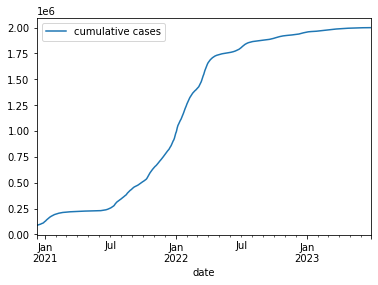

In [27]:
# 1. Aggregate
SW_cum = covid_data5[covid_data5.area == 'South West'].reset_index()[['date', 'cumulative cases']]
# 2. Plot
SW_cum.plot(x='date', y='cumulative cases')
# 3. Comment
# Cases have plateaued after a sharp spike from July 2021 to July 2022.

Show the evolution through time of cumulative cases summed over all areas.

Question: How does the pattern seen in South West hold country-wide?

<AxesSubplot:xlabel='date'>

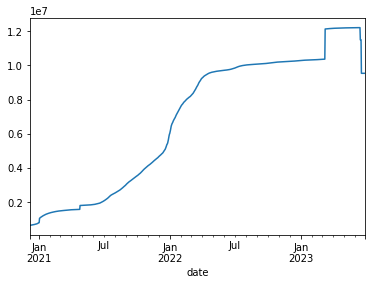

In [28]:
# 1. Aggregate
allarea_cum = covid_data5.reset_index()[['date', 'cumulative cases']]
allarea_cum = allarea_cum.groupby('date')['cumulative cases'].agg('sum')
# 2. Plot
allarea_cum.plot(x='date', y='cumulative cases')
# 3. Comment
# the plateaued pattern holds

Now, instead of summing the data over areas, show us the evolution of cumulative cases of different areas as different lines in a plot.

Question: What patterns do all nations/regions share?

<AxesSubplot:xlabel='date'>

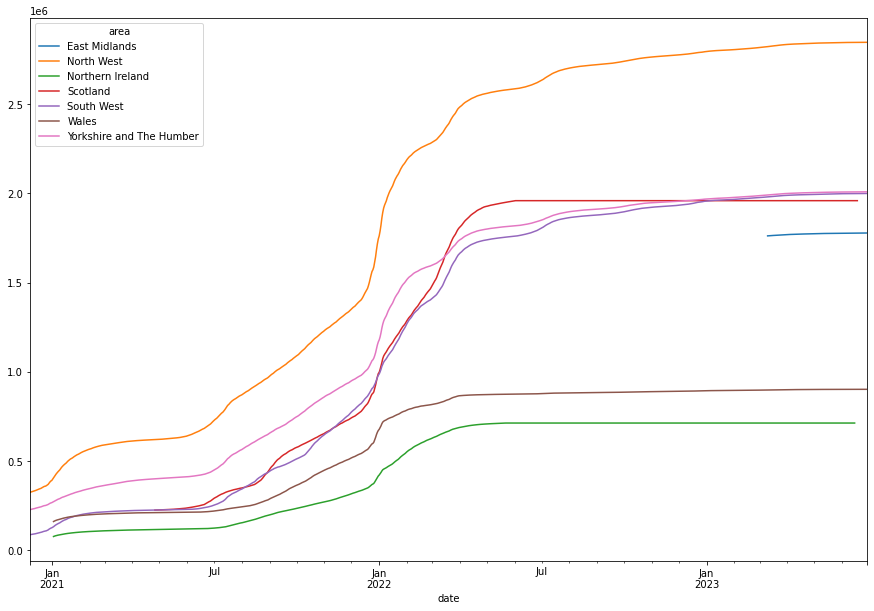

In [29]:
# 1. Aggregate
areas_cum = covid_data5[['date', 'area', 'cumulative cases']]
areas_cum = areas_cum.pivot(index='date', columns='area', values='cumulative cases')
# 2. Plot
areas_cum.plot(figsize=(15,10))
# 3. Comment
# stable from Jan to July 2021, and increase starting from July, leveling off again after April 2022

Show us the evolution of cumulative deaths in South West through time.

Question: Is there a noticeable period in time when the ongoing trend is broken? When?

<AxesSubplot:xlabel='date'>

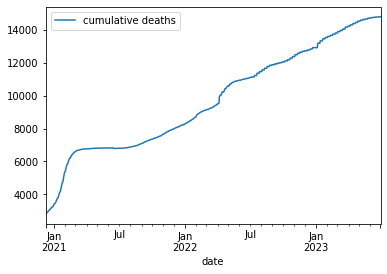

In [30]:
# 1. Aggregate
SW_cum = covid_data5[covid_data5.area == 'South West'].reset_index()[['date', 'cumulative deaths']]
# 2. Plot
SW_cum.plot(x='date', y='cumulative deaths')
# 3. Comment
# The cumulative death toll continues to rise, with the sharpest increase from January to March 2021

Create a new column, cumulative deaths per cases, showing the ratio between cumu- lative deaths and cumulative cases in each row. Show us its sum over all regions/nations as a function of time.

Question: What overall trends can be seen?

<AxesSubplot:xlabel='date'>

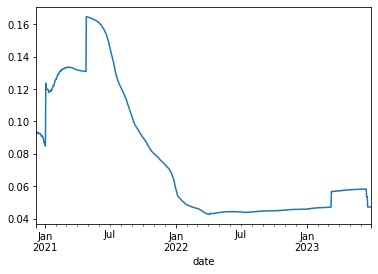

In [31]:
# 1. Aggregate
new_covid_data = covid_data5
new_covid_data['cumulative deaths per cases'] = new_covid_data['cumulative deaths'] / new_covid_data['cumulative cases']
new_covid_data = new_covid_data[['date', 'cumulative deaths per cases']]
new_covid_data = new_covid_data.groupby('date')['cumulative deaths per cases'].agg('sum')
# 2. Plot
new_covid_data.plot()
# 3. Comment
# The ratio is on an upward trend until April 21, drops sharply from May 21 to April 22, and then plateaus to date

Show us the sum of cumulative vaccinations over all areas as a function of time.

Question: Are there any relationships between the trends seen here and the ones seen in last plot?


<AxesSubplot:xlabel='date'>

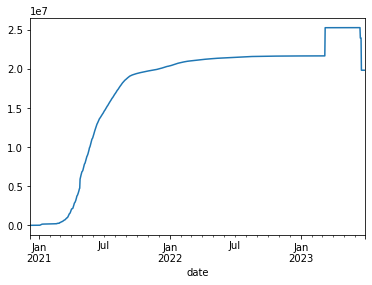

In [32]:
# 1. Aggregate
allarea_cum = covid_data5[['date', 'cumulative vaccinated']]
allarea_cum = allarea_cum.groupby('date')['cumulative vaccinated'].agg('sum')
# 2. Plot
allarea_cum.plot()
# 3. Comment
# As the value of cumulative vaccinated increases, the value of death rate decreases

Show us the daily cases rolling average as a function of time, separated by areas.

<AxesSubplot:xlabel='date'>

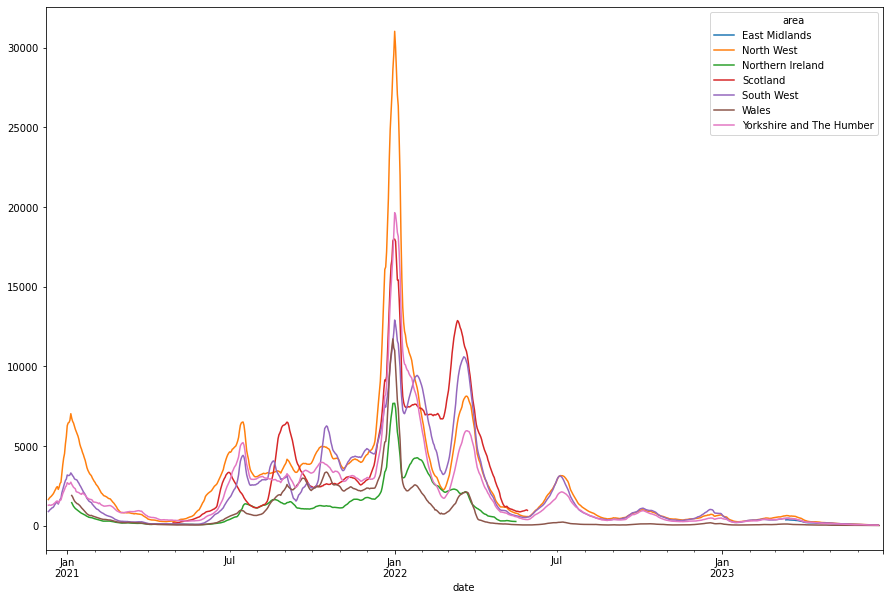

In [33]:
# 1. Aggregate
areas_cum = covid_data5[['date', 'area', 'daily cases roll avg']]
areas_cum = areas_cum.pivot(index='date', columns='area', values='daily cases roll avg')
# 2. Plot
areas_cum.plot(figsize=(15,10))

Show us a rolling average of daily cases for a specific region as a function of time.

<AxesSubplot:xlabel='date'>

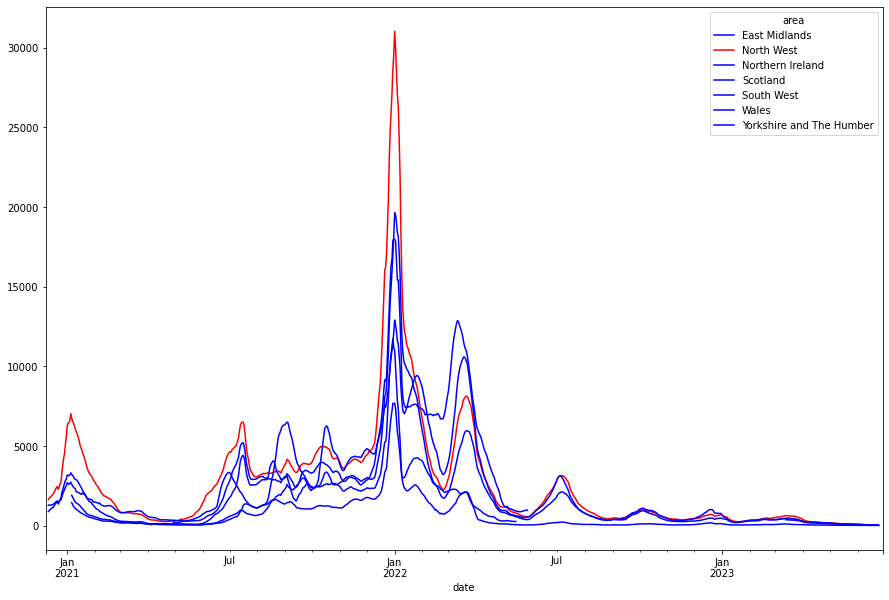

In [34]:
areas_cum.plot(color = {'North West': 'red', 'East Midlands': 'blue', 'Northern Ireland': 'blue', 'Scotland': 'blue', 'South West': 'blue', 'South East': 'blue', 'Wales': 'blue', 'Yorkshire and The Humber': 'blue'}, figsize=(15,10))

To be able to compare numbers of cases and deaths, we should normalise them. Create two new columns, daily cases roll avg norm and daily deaths roll avg norm, ob- tained by performing a simple normalisation on all values in the daily cases roll avg and daily deaths roll avg columns; for each column, you divide all values by the max- imum value in that column.
Now, on the same line plot with date as the x-axis, plot two lines: the normalised rolling average of deaths and the normalised rolling average of cases summed over all areas.

Question: Are daily trends of cases and deaths increasing and decreasing at the same rates? What part of the plot tells you this?

<AxesSubplot:xlabel='date'>

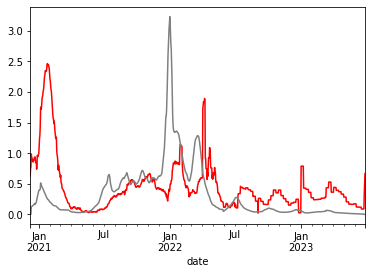

In [35]:
# 1. Aggregate
new_covid_data = covid_data5
new_covid_data['daily cases roll avg norm'] = new_covid_data['daily cases roll avg'] / new_covid_data['daily cases roll avg'].max()
new_covid_data['daily deaths roll avg norm'] = new_covid_data['daily deaths roll avg'] / new_covid_data['daily deaths roll avg'].max()
new_covid_data = new_covid_data[['daily deaths roll avg norm', 'daily cases roll avg norm', 'date']]
daily_deaths_norm = new_covid_data.groupby('date')['daily deaths roll avg norm'].agg('sum')
daily_cases_norm = new_covid_data.groupby('date')['daily cases roll avg norm'].agg('sum')
# 2. Plot
daily_deaths_norm.plot(color='red')
daily_cases_norm.plot(color='grey')
# 3. Comment
# Each mass case was followed by a mass death. We can see it from Jan to Feb 21, Jan to Feb & Feb to Apr 22.

The dataframe covid data vaccinations wide has some columns expressed as per- centage of population. First, split this dataframe into two dataframes, one for South West, one for Scotland.

In [36]:
covid_data_vaccinations_wide_SW = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area'] == 'South West'].reset_index()
covid_data_vaccinations_wide_scotland = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area'] == 'Scotland'].reset_index()

In [37]:
covid_data_vaccinations_wide_SW

,level_0,index,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedSpring23ByVaccinationDate,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,cumVaccinationAutumn22UptakeByVaccinationDatePercentage,cumVaccinationSpring23UptakeByVaccinationDatePercentage,date,...,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,cumPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,cumVaccinationSpring22UptakeByVaccinationDatePercentage
0,56154,0,05_11,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-28,...,25.0,1608.0,0.0,13.0,8.8,8.8,0.4,NaN,NaN,NaN
1,56155,1,12_15,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-28,...,10.0,4666.0,0.0,51.6,39.2,39.2,1.7,NaN,NaN,NaN
2,56156,2,16_17,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-28,...,2.0,16928.0,0.0,70.2,55.5,55.5,12.8,NaN,NaN,NaN
3,56157,3,18_24,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-28,...,2.0,225610.0,0.0,78.6,71.9,71.9,45.9,NaN,NaN,NaN
4,56158,4,25_29,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-28,...,0.0,187946.0,1.0,75.6,71.1,71.1,49.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,74809,15,75+,None,None,None,None,None,None,2020-12-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
18656,74810,16,75_79,None,None,None,None,None,None,2020-12-08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
18657,74811,17,80_84,None,None,None,None,None,None,2020-12-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
18658,74812,18,85_89,None,None,None,None,None,None,2020-12-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None


Now, mould the SW dataframe such that each row corresponds to a date, each column corresponds to an age interval, and the data in a dataframe cell is the value of cumVaccinationFirstDoseUptakeByVaccinationDatePercentage for that age interval and date.

Plot the SW dataframe as a line chart with multiple lines, each representing an age interval, showing the growth in vaccination coverage per age group.

Because this plot will generate over ten lines, colours will repeat. Add this argument to your call of the plot() method: style=[’--’ for in range(10)]. This will force the first ten lines to become dashed.

Question: Were all age groups vaccinated equally and at the same time, or was there a strategy employed? What strategy does the plot indicate and why?

In [41]:
covid_data_vaccinations_wide_SW.age.unique()

array(['05_11', '12_15', '16_17', '18_24', '25_29', '30_34', '35_39',
       '40_44', '45_49', '50+', '50_54', '55_59', '60_64', '65_69',
       '70_74', '75+', '75_79', '80_84', '85_89', '90+'], dtype=object)

In [88]:
column_names = ['date', '05_11', '12_15', '16_17', '18_24', '25_29', '30_34', '35_39',
       '40_44', '45_49', '50+', '50_54', '55_59', '60_64', '65_69',
       '70_74', '75+', '75_79', '80_84', '85_89', '90+']
covid_data_cvfdu = pd.DataFrame(columns=column_names)


In [89]:
row_index = -1
for index, row in covid_data_vaccinations_wide_SW.iterrows():
    age = row['age']
    if age == '05_11':
        #covid_data_cvfdu = covid_data_cvfdu.append(pd.Series(dtype='float64'), ignore_index=True)
        row_index += 1
    #covid_data_cvfdu['date'][row_index] = row['date']
    covid_data_cvfdu.loc[row_index,'date'] = row['date']
    covid_data_cvfdu[age][row_index] = row['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']
covid_data_cvfdu

,date,05_11,12_15,16_17,18_24,25_29,30_34,35_39,40_44,45_49,...,50_54,55_59,60_64,65_69,70_74,75+,75_79,80_84,85_89,90+
0,2023-06-28 00:00:00,13.0,51.6,70.2,78.6,75.6,76.6,79.3,82.8,86.5,...,90.4,92.5,93.8,94.7,96.0,NaN,97.2,97.7,97.9,97.3
1,2023-06-27 00:00:00,13.0,51.6,70.2,78.6,75.6,76.6,79.3,82.8,86.5,...,90.4,92.5,93.8,94.7,96.0,NaN,97.2,97.7,97.9,97.3
2,2023-06-26 00:00:00,13.0,51.6,70.2,78.6,75.6,76.6,79.3,82.8,86.5,...,90.4,92.5,93.8,94.7,96.0,NaN,97.2,97.7,97.9,97.3
3,2023-06-25 00:00:00,13.0,51.6,70.2,78.6,75.6,76.6,79.3,82.8,86.5,...,90.4,92.5,93.8,94.7,96.0,NaN,97.2,97.7,97.9,97.3
4,2023-06-24 00:00:00,13.0,51.6,70.2,78.6,75.6,76.6,79.3,82.8,86.5,...,90.4,92.5,93.8,94.7,96.0,NaN,97.2,97.7,97.9,97.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2020-12-12 00:00:00,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.2,...,0.2,0.2,0.2,0.1,0.1,NaN,0.1,0.1,0.2,0.1
929,2020-12-11 00:00:00,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,NaN,0.1,0.1,0.1,0.1
930,2020-12-10 00:00:00,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,NaN,0.0,0.1,0.1,0.1
931,2020-12-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.1,...,0.1,0.1,0.1,0.1,0.0,NaN,0.0,0.0,0.1,0.0


<AxesSubplot:xlabel='date'>

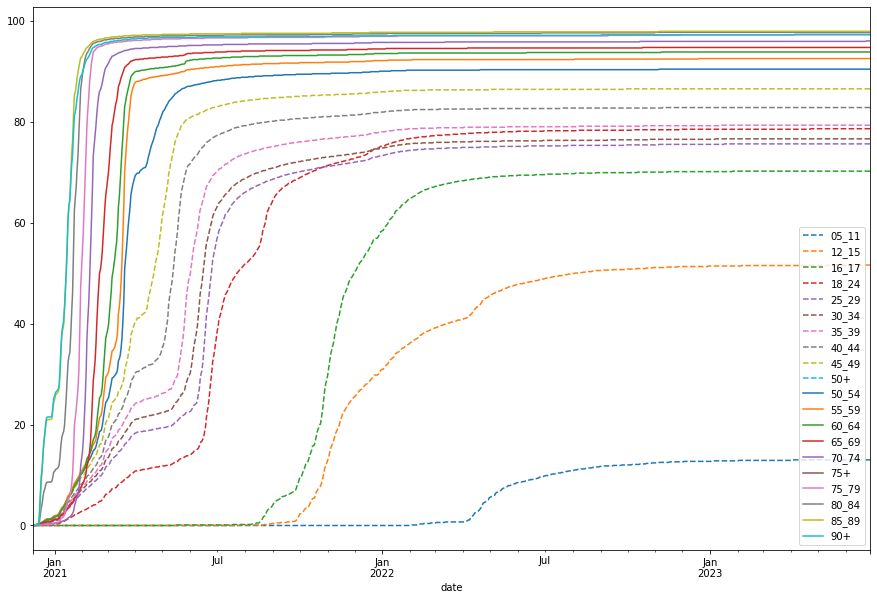

In [90]:
covid_data_cvfdu.plot(x='date', figsize=(15,10), style=['--' for _ in range(10)] )

In [91]:
# According to the chart, the elderly are the first to be vaccinated. 
# Over 90% of older people are vaccinated before middle-aged people are vaccinated. 
# The younger the person, the later the vaccination is given.

Do the same transformations asked in the last question, but for the Scotland dataframe.

In [92]:
covid_data_vaccinations_wide_scotland.age.unique()

array(['05_11', '12_15', '16_17', '18_29', '30_39', '40_49', '50+',
       '50_54', '55_59', '60_64', '65_69', '70_74', '75+', '75_79', '80+'],
      dtype=object)

In [93]:
scot_column_names = ['date', '05_11', '12_15', '16_17', '18_29', '30_39', '40_49', '50+',
       '50_54', '55_59', '60_64', '65_69', '70_74', '75+', '75_79', '80+']
scot_covid_data_cvfdu = pd.DataFrame(columns=scot_column_names)

In [96]:
row_index2 = -1
for index, row in covid_data_vaccinations_wide_scotland.iterrows():
    age = row['age']
    if age == '05_11':
        #scot_covid_data_cvfdu = pd.concat([scot_covid_data_cvfdu, pd.Series(dtype='float64').to_frame().T], ignore_index=True)
        row_index2 += 1
    scot_covid_data_cvfdu.loc[row_index2,'date'] = row['date']
    scot_covid_data_cvfdu.loc[row_index2,age] = row['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']
scot_covid_data_cvfdu

,date,05_11,12_15,16_17,18_29,30_39,40_49,50+,50_54,55_59,60_64,65_69,70_74,75+,75_79,80+
0,2023-06-18 00:00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2023-06-17 00:00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2023-06-16 00:00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2023-06-15 00:00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2023-06-14 00:00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2021-04-30 00:00:00,0.0,0.0,1.6,17.2,25.7,37.8,NaN,83.0,95.4,100.0,100.0,94.4,NaN,100.0,98.2
780,2021-04-29 00:00:00,0.0,0.0,1.6,17.1,25.7,37.3,NaN,81.8,95.4,100.0,100.0,94.4,NaN,100.0,98.2
781,2021-04-28 00:00:00,0.0,0.0,1.5,17.1,25.6,36.9,NaN,81.0,95.3,100.0,100.0,94.4,NaN,100.0,98.2
782,2021-04-27 00:00:00,0.0,0.0,1.5,17.0,25.5,36.6,NaN,80.2,95.3,100.0,100.0,94.4,NaN,100.0,98.2


<AxesSubplot:xlabel='date'>

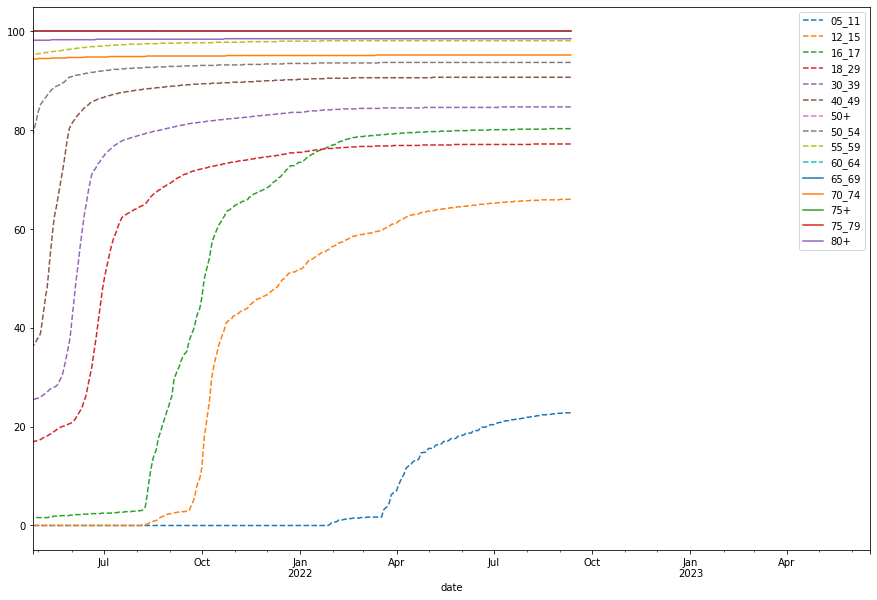

In [97]:
scot_covid_data_cvfdu.plot(x='date', figsize=(15,10), style=['--' for _ in range(10)] )